In [205]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
font = {
    'size': 'large',
    'weight': 'bold'
}

In [206]:
data=pd.read_csv('911.csv')

In [207]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# How many different types of calls.

In [208]:
def c_type(x):
    x=x.split(':')
    return x[0]

In [209]:
data['call_type']=data['title'].apply(c_type)

In [210]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [211]:
type_data=data.groupby('call_type')['call_type'].count()

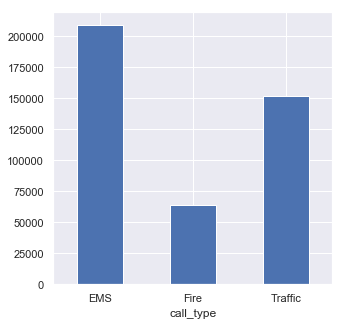

In [240]:
sns.set(rc={'figure.figsize':(5,5)})
type_data.plot(kind='bar')
plt.xticks(rotation=0)
plt.savefig('type.png')

# Extract the date and time regarding the calls

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 10 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
call_type    423909 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 32.3+ MB


In [214]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [215]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 10 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null datetime64[ns]
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
call_type    423909 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 32.3+ MB


# At what time of day/month I can expect which type of call.

In [217]:
data['year'] = data['timeStamp'].dt.year
data['month'] = data['timeStamp'].dt.month_name()
data['day'] = data['timeStamp'].dt.day_name()
data['hour'] = data['timeStamp'].dt.hour

In [218]:
d1=data.groupby(['month','call_type'])['call_type'].count()

In [219]:
d1.head()

month   call_type
April   EMS          17255
        Fire          4983
        Traffic      11345
August  EMS          17965
        Fire          5717
Name: call_type, dtype: int64

In [220]:
d11 = d1.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))

In [221]:
d11.head()

month   call_type
April   EMS          51.0
        Fire         15.0
        Traffic      34.0
August  EMS          50.0
        Fire         16.0
Name: call_type, dtype: float64

In [222]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d11=d11.reindex(month_order, level=0)

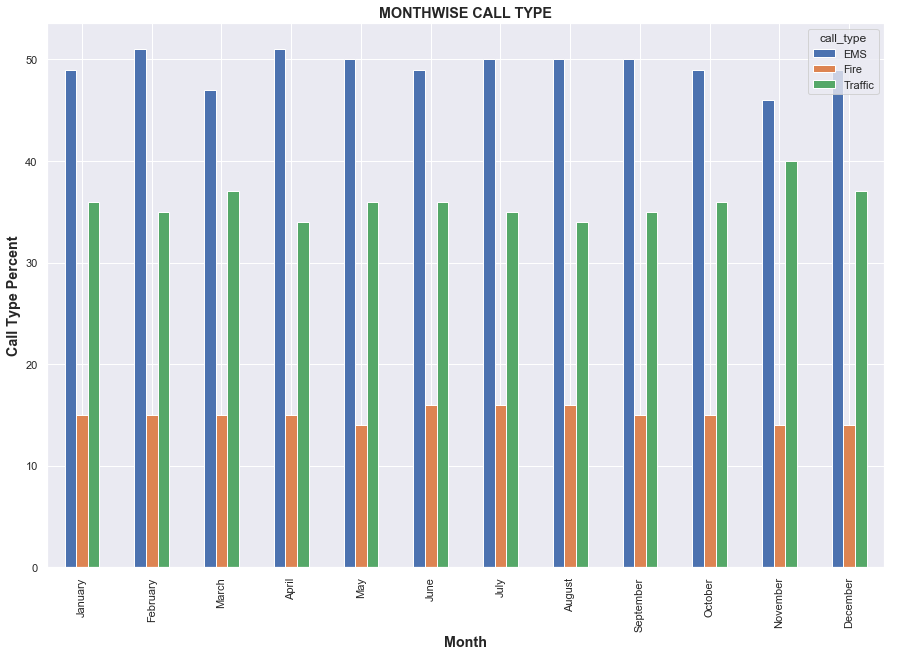

In [223]:
sns.set(rc={'figure.figsize':(15,10)})
d11.unstack().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Month',fontdict=font)
plt.ylabel('Call Type Percent',fontdict=font)
plt.title('MONTHWISE CALL TYPE',fontdict=font)
plt.savefig('monthly.png')

In [224]:
d2=data.groupby(['day','call_type'])['call_type'].count()

In [225]:
d2.head()

day     call_type
Friday  EMS          31010
        Fire          9683
        Traffic      25058
Monday  EMS          30431
        Fire          9292
Name: call_type, dtype: int64

In [226]:
d22 = d2.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))

In [227]:
d22.head()

day     call_type
Friday  EMS          47.0
        Fire         15.0
        Traffic      38.0
Monday  EMS          50.0
        Fire         15.0
Name: call_type, dtype: float64

In [228]:
day_order = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
d22=d22.reindex(day_order, level=0)

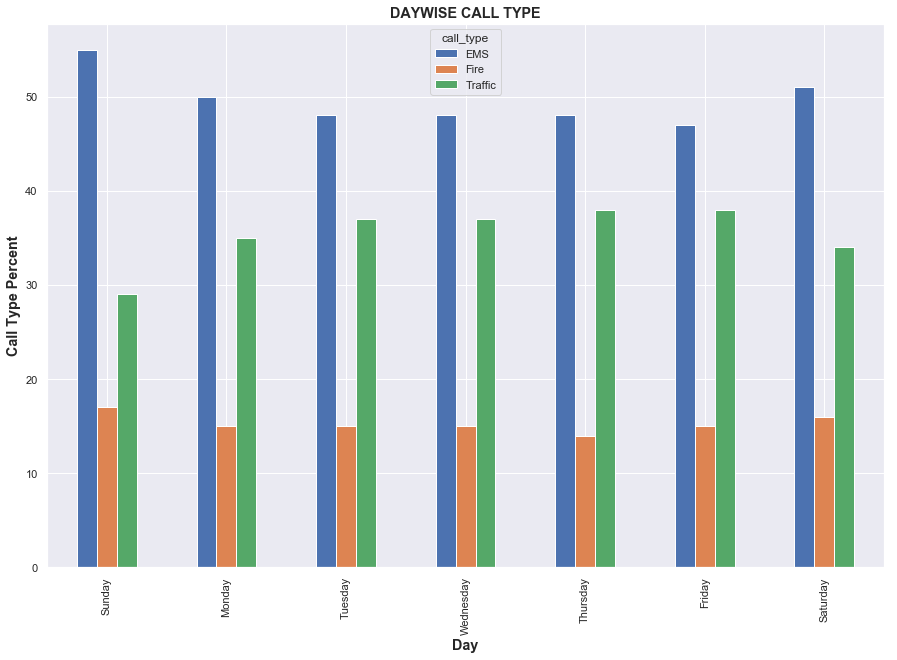

In [229]:
d22.unstack().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Day',fontdict=font)
plt.ylabel('Call Type Percent',fontdict=font)
plt.title('DAYWISE CALL TYPE',fontdict=font)
plt.savefig('daily.png')

# Visualize the percentage share of emergency type for each call.

In [230]:
def e_type(x):
    x=x.split(':')
    return x[1]

In [231]:
data['emergency_type']=data['title'].apply(e_type)

In [232]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,year,month,day,hour,emergency_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,17,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,17,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,Thursday,14,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,Thursday,16,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,Thursday,16,DIZZINESS


In [233]:
d3=data.groupby(['call_type','emergency_type'])['emergency_type'].count()

In [234]:
d3.head()

call_type  emergency_type        
EMS         ABDOMINAL PAINS          5802
            ACTIVE SHOOTER              3
            ALLERGIC REACTION        1868
            ALTERED MENTAL STATUS    6184
            AMPUTATION                 65
Name: emergency_type, dtype: int64

In [235]:
d33 = d3.groupby(level=0).apply(lambda x: round(100*x/float(x.sum()),2))

In [236]:
d33.head()

call_type  emergency_type        
EMS         ABDOMINAL PAINS          2.78
            ACTIVE SHOOTER           0.00
            ALLERGIC REACTION        0.90
            ALTERED MENTAL STATUS    2.96
            AMPUTATION               0.03
Name: emergency_type, dtype: float64

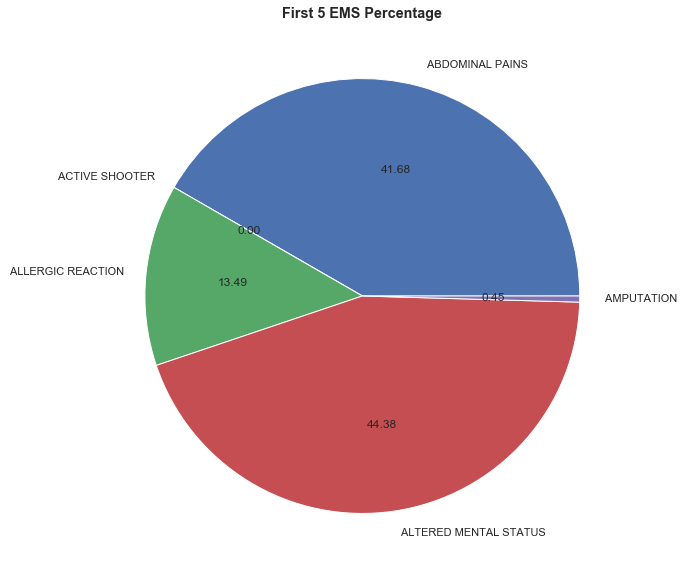

In [237]:
sns.set(rc={'figure.figsize':(10,10)})
plt.pie(d33['EMS'][:5],labels=d33['EMS'][:5].index,autopct='%.2f')
plt.title('First 5 EMS Percentage',fontdict=font)
plt.savefig('EMS.png')

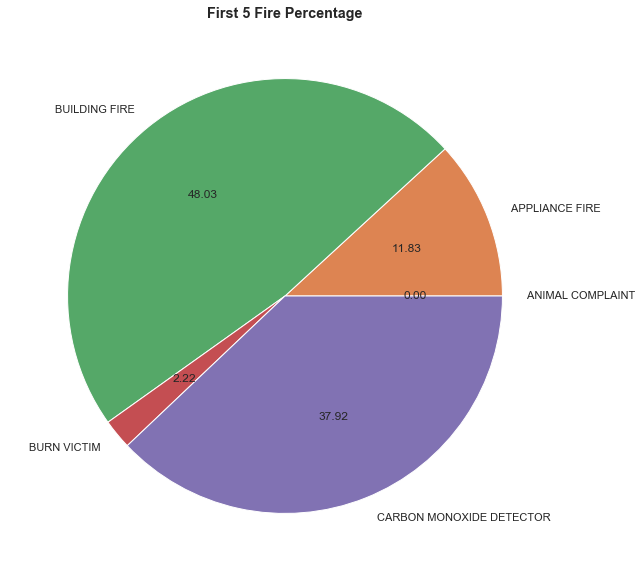

In [238]:
plt.pie(d33['Fire'][:5],labels=d33['Fire'][:5].index,autopct='%.2f')
plt.title('First 5 Fire Percentage',fontdict=font)
plt.savefig('Fire.png')

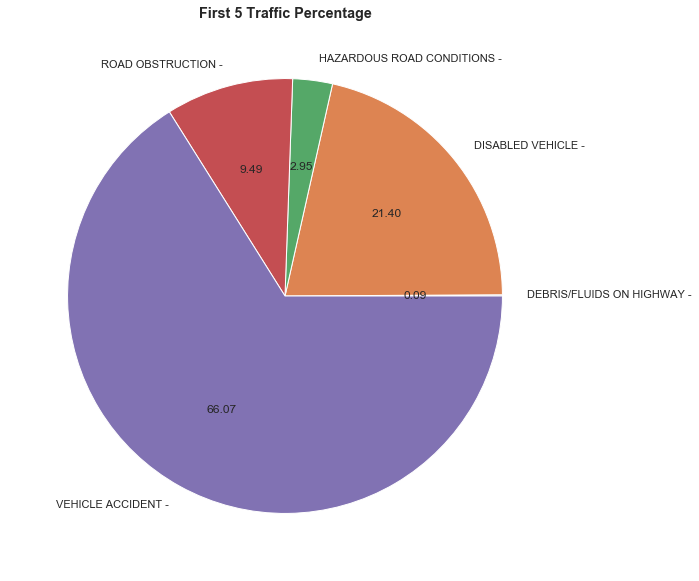

In [239]:
plt.pie(d33['Traffic'][:5],labels=d33['Traffic'][:5].index,autopct='%.2f')
plt.title('First 5 Traffic Percentage',fontdict=font)
plt.savefig('Traffic.png')